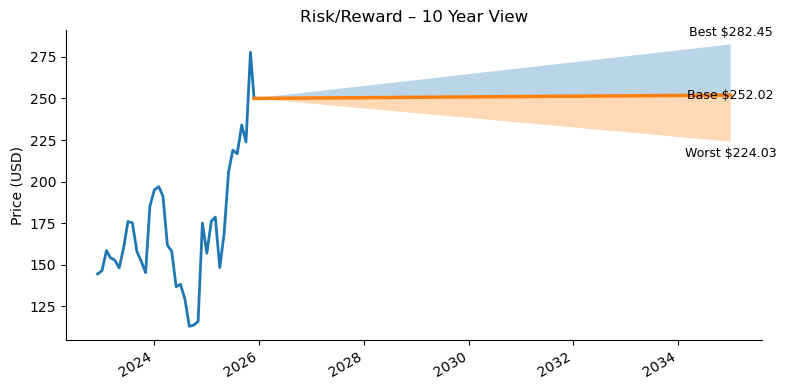

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Data
data = [
    ("Dec 1, 2022", 144.51),
    ("Jan 1, 2023", 146.48),
    ("Feb 1, 2023", 158.59),
    ("Mar 1, 2023", 154.22),
    ("Apr 1, 2023", 152.78),
    ("May 1, 2023", 148.15),
    ("Jun 1, 2023", 160.37),
    ("Jul 1, 2023", 176.00),
    ("Aug 1, 2023", 175.23),
    ("Sep 1, 2023", 158.10),
    ("Oct 1, 2023", 152.27),
    ("Nov 1, 2023", 145.30),
    ("Dec 1, 2023", 185.25),
    ("Jan 1, 2024", 195.00),
    ("Feb 1, 2024", 197.00),
    ("Mar 1, 2024", 191.26),
    ("Apr 1, 2024", 161.86),
    ("May 1, 2024", 158.14),
    ("Jun 1, 2024", 136.85),
    ("Jul 1, 2024", 138.32),
    ("Aug 1, 2024", 129.40),
    ("Sep 1, 2024", 113.06),
    ("Oct 1, 2024", 113.76),
    ("Nov 1, 2024", 115.98),
    ("Dec 1, 2024", 175.03),
    ("Jan 1, 2025", 157.00),
    ("Feb 1, 2025", 176.17),
    ("Mar 1, 2025", 178.70),
    ("Apr 1, 2025", 148.36),
    ("May 1, 2025", 168.40),
    ("Jun 1, 2025", 205.67),
    ("Jul 1, 2025", 218.90),
    ("Aug 1, 2025", 216.80),
    ("Sep 1, 2025", 234.00),
    ("Oct 1, 2025", 223.88),
    ("Nov 1, 2025", 277.73),
    ("Nov 26, 2025", 250.00),
]

dates = [datetime.strptime(d, "%b %d, %Y") for d, _ in data]
prices = [p for _, p in data]

today_date = datetime.strptime("Nov 26, 2025", "%b %d, %Y")
future_date = datetime.strptime("Jan 1, 2035", "%b %d, %Y")

base_today = 250.0
base_future = 252.02
best_future = 282.45
worst_future = 224.03

future_dates = [today_date, future_date]
base_line = [base_today, base_future]
best_line = [base_today, best_future]
worst_line = [base_today, worst_future]

fig, ax = plt.subplots(figsize=(8,4))

ax.plot(dates, prices, linewidth=2, label="Price")
ax.plot(future_dates, base_line, linewidth=2.5, label="Base")
ax.fill_between(future_dates, base_line, best_line, alpha=0.3)
ax.fill_between(future_dates, base_line, worst_line, alpha=0.3)

ax.grid(False)

# Remove only top and right borders (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title("Risk/Reward – 10 Year View")
ax.set_ylabel("Price (USD)")

ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig.autofmt_xdate()

# Put labels slightly offset around the future point
ax.text(future_date, best_future + 3, f"Best ${best_future:.2f}", ha="center", va="bottom", fontsize=9)
ax.text(future_date, base_future, f"Base ${base_future:.2f}", ha="center", va="center", fontsize=9)
ax.text(future_date, worst_future - 3, f"Worst ${worst_future:.2f}", ha="center", va="top", fontsize=9)

plt.tight_layout()
plt.show()

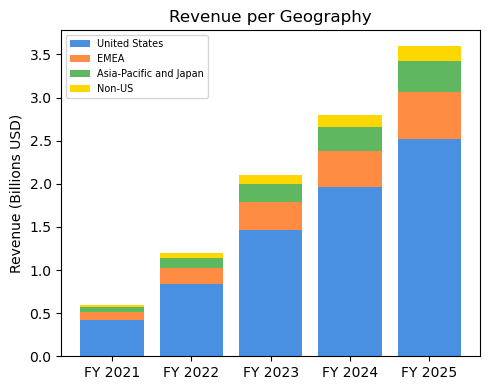

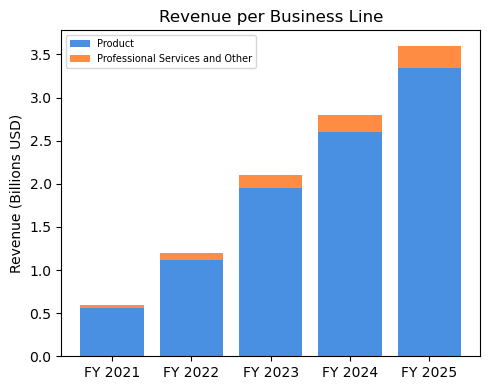

In [5]:
import matplotlib.pyplot as plt
import numpy as np

years = ["FY 2021", "FY 2022", "FY 2023", "FY 2024", "FY 2025"]

# Approximate total revenue path (in billions)
total_rev = np.array([0.6, 1.2, 2.1, 2.8, 3.6])

# Geography splits (fractions)
us = total_rev * 0.7
emea = total_rev * 0.15
apj = total_rev * 0.1
non_us = total_rev * 0.05

x = np.arange(len(years))

# Define colors to match your images
blue = '#4A90E2'
orange = '#FF8C42'
green = '#5FB85F'
yellow = '#FFD700'

# --- Chart 1: Revenue per Geography ---
fig1, ax1 = plt.subplots(figsize=(5,4))
ax1.bar(x, us, label="United States", color=blue)
ax1.bar(x, emea, bottom=us, label="EMEA", color=orange)
ax1.bar(x, apj, bottom=us+emea, label="Asia-Pacific and Japan", color=green)
ax1.bar(x, non_us, bottom=us+emea+apj, label="Non-US", color=yellow)

ax1.set_xticks(x)
ax1.set_xticklabels(years, rotation=0)
ax1.set_ylabel("Revenue (Billions USD)")
ax1.set_title("Revenue per Geography")
ax1.legend(fontsize=7)
ax1.grid(False)
fig1.tight_layout()

# --- Chart 2: Revenue per Business Line ---
product = total_rev * 0.93
services = total_rev * 0.07

fig2, ax2 = plt.subplots(figsize=(5,4))
ax2.bar(x, product, label="Product", color=blue)
ax2.bar(x, services, bottom=product, label="Professional Services and Other", color=orange)
ax2.set_xticks(x)
ax2.set_xticklabels(years)
ax2.set_ylabel("Revenue (Billions USD)")
ax2.set_title("Revenue per Business Line")
ax2.legend(fontsize=7)
ax2.grid(False)
fig2.tight_layout()

plt.show()